In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import os
from matplotlib.collections import LineCollection

os.getcwd()
#os.chdir("./clean_AL_prototype/plots/")


'/Users/swyant/cesmix/exploratory/new_public/lammps_related/lammps_jl_tests/md_loops/clean_AL_prototype/plots'

In [2]:
num_iters = 4
window = 4000

In [3]:
steps_list =[]
temps_list = []
estds_list = []
for i in range(num_iters):
    data = np.loadtxt(f"iteration{i+1}_data.csv",delimiter=",",skiprows=1)
    steps      = data[:,0]
    temps      = data[:,1]
    energy_std = data[:,2]

    steps_list.append(steps)
    temps_list.append(temps)
    estds_list.append(energy_std)


In [4]:
len(steps_list[3])

200001

This whole business of prepending the window avg is a bit hand-wavy, and would need to be fixed if this were ever to be published.
But because it's just about getting the coloring qualitiatively correct, I'm not too worried

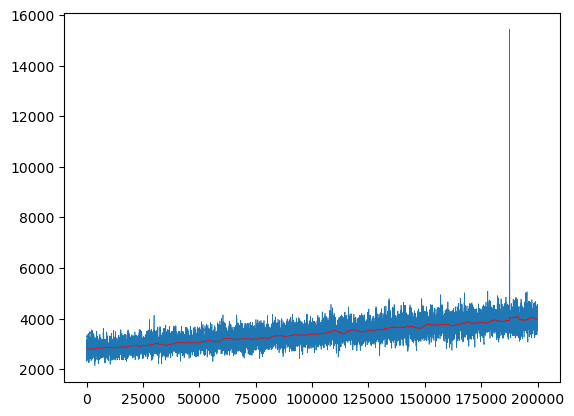

In [5]:
fig, ax = plt.subplots()
ax.plot(steps_list[3],temps_list[3],lw=0.5)
window_avg = np.convolve(temps_list[3], np.ones((window,))/window, mode="valid")
window_steps = np.array([float(i+1) for i in range(len(window_avg))])
num_pad_steps = len(steps_list[3]) - len(window_avg)
pad_array = np.full((num_pad_steps),2800)
window_avg = np.insert(window_avg, 0,pad_array)

ax.plot(steps_list[3],window_avg,lw=0.5,color="r")


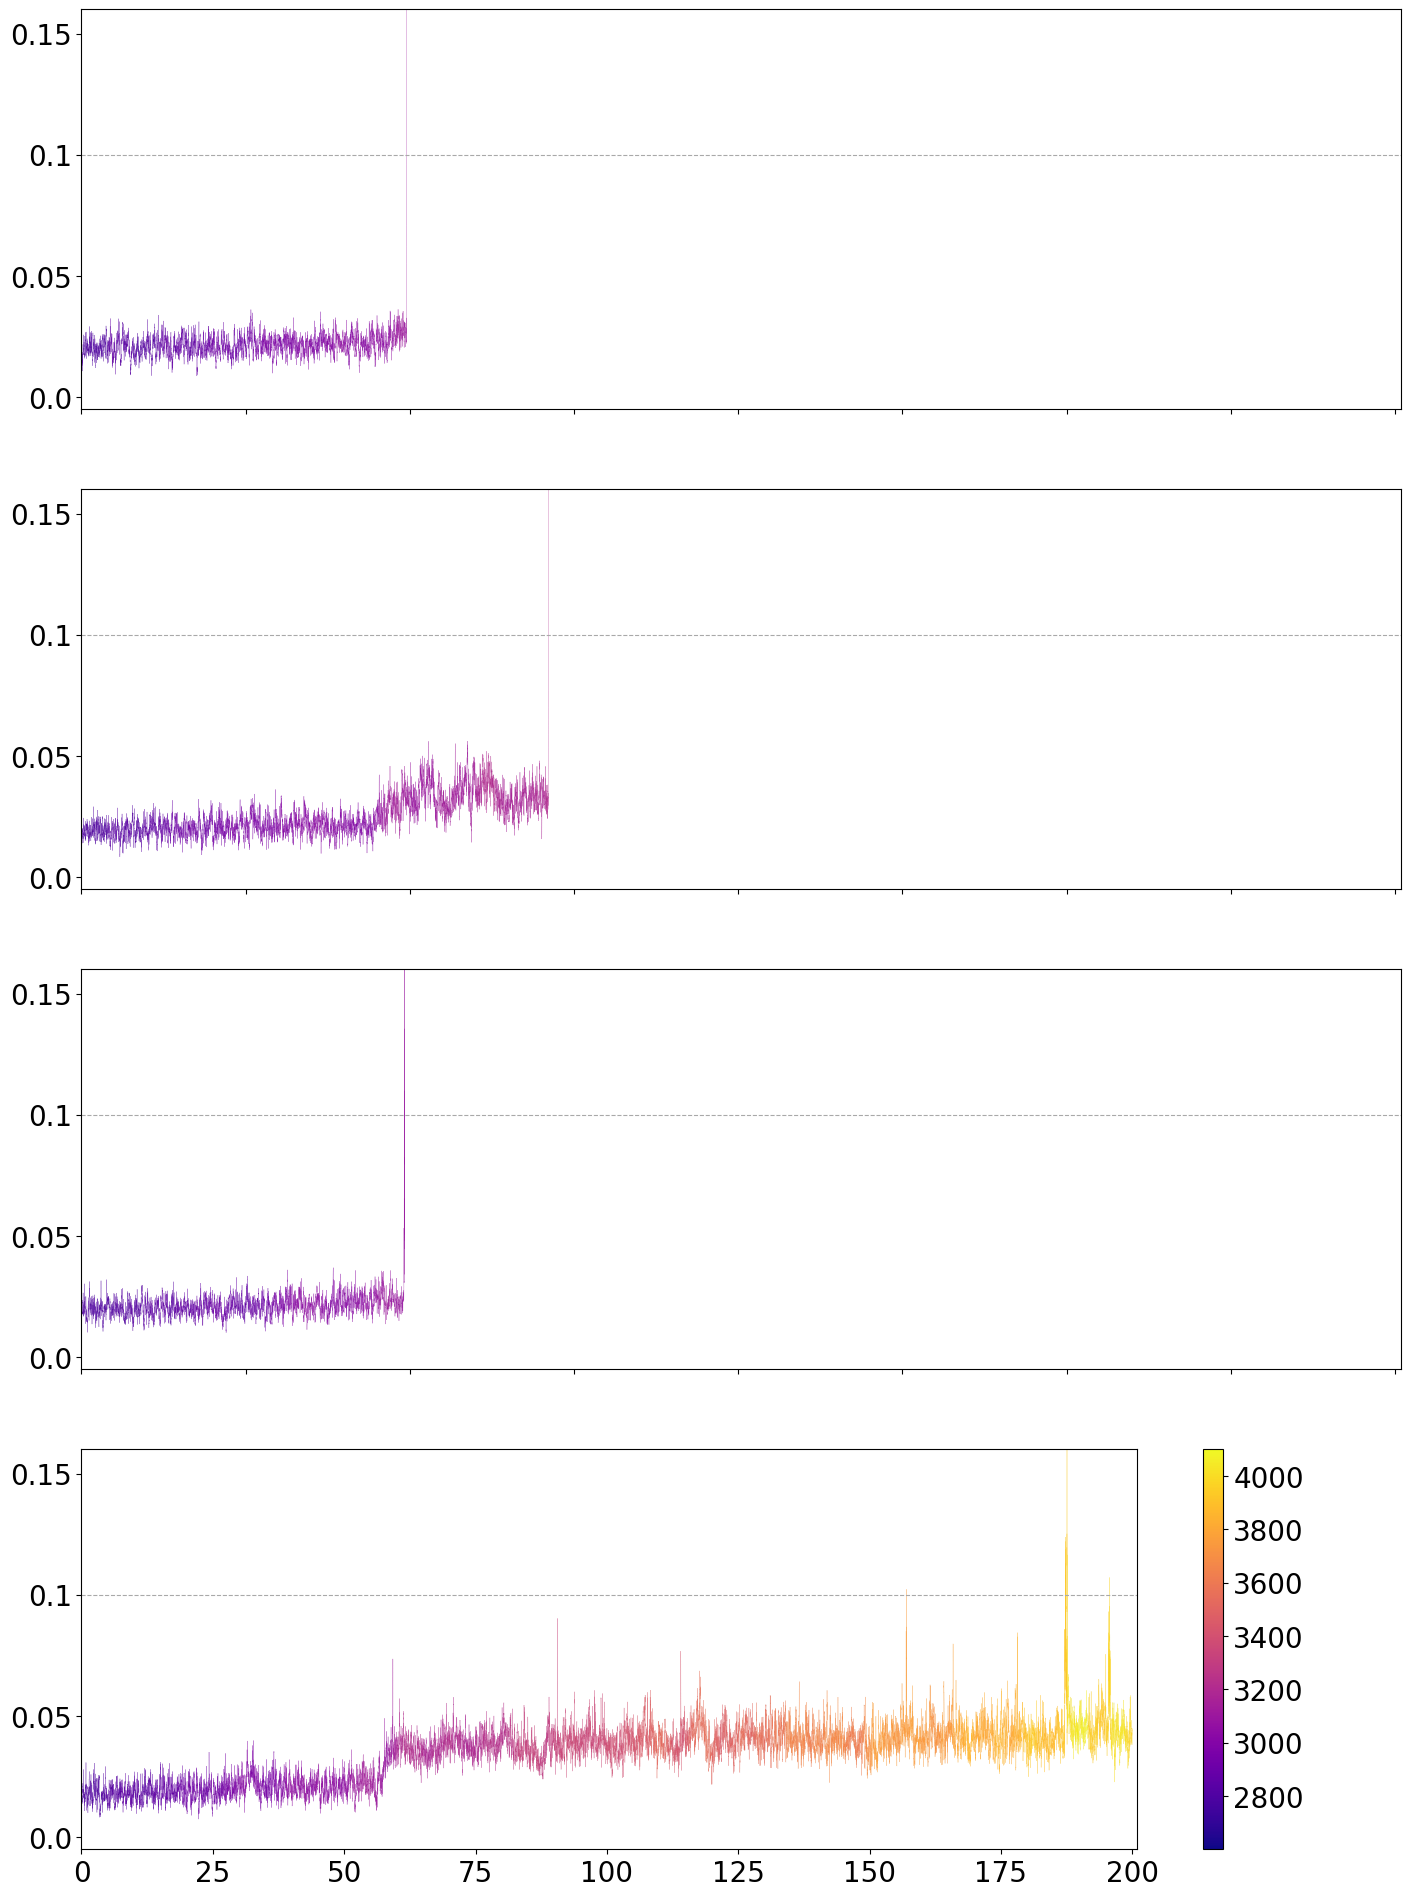

In [10]:
fig, axs = plt.subplots(num_iters,1,sharex=True,sharey=True, figsize=(16,20))
norm = plt.Normalize(2600,4100)
lw = 0.2
cmap = "plasma"
for i in range(num_iters):
    points = np.array([steps_list[i],estds_list[i]]).T.reshape(-1,1,2)
    segments = np.concatenate([points[:-1],points[1:]],axis=1)
    window_avg = np.convolve(temps_list[i], np.ones((window,))/window, mode="valid")
    num_pad_steps = len(steps_list[i]) - len(window_avg)
    pad_array = np.full((num_pad_steps),2800)
    window_avg = np.insert(window_avg,0,pad_array)

    lc = LineCollection(segments,cmap=cmap, norm=norm)
    lc.set_array(window_avg)
    lc.set_linewidth(lw)
    line = axs[i].add_collection(lc)
    axs[i].axhline(0.1,linestyle="--",lw=0.8,color="darkgrey")
    axs[i].set_yticks([0.0,0.05,0.1,0.15])
    axs[i].set_yticklabels([0.0,0.05,0.1,0.15])
    axs[i].tick_params(axis="both", labelsize=20)

cbar = plt.colorbar(line, ticks=[2800,3000,3200,3400,3600,3800,4000])
tick_font_size = 20
cbar.ax.tick_params(labelsize=tick_font_size)
axs[0].set_ylim([-0.005,0.16])
axs[0].set_xlim(0,201000)

axs[3].set_xticks([0,25000,50000,75000,100000,125000,150000,175000,200000])
axs[3].set_xticklabels([0,25,50,75,100,125,150,175,200])

plt.subplots_adjust(top=0.97,
                    bottom=0.05,
                    left=0.125,
                    right=0.95)
#plt.savefig("large_iteration.png",dpi=1000)
plt.savefig("large_with_color_bar.png",dpi=1000)

#plt.savefig("with_color_bar.png",dpi=1000)

In [55]:
plt.savefig("test.png",dpi=1000)

<Figure size 640x480 with 0 Axes>